# DRACO - Milestone 2: Dataset exploration

This document is structured as follow:

1. Characters Data - Extraction and Processing
2. Movie Data - Extraction and Processing
3. Actors Ethinicites - Exploration

---

In [211]:
import pandas as pd
import json

In [212]:
DATA_FOLDER = './Data/'

CHARACTER_PATH = DATA_FOLDER + 'MovieSummaries/character.metadata.tsv'
MOVIE_PATH = DATA_FOLDER + 'MovieSummaries/movie.metadata.tsv'
ETHNICITY_PATH = DATA_FOLDER + 'ethnicities_data.tsv'

## Characters Data - Extraction and Processing

First, we will load the character dataset and the ethnicity dataset. This is done to subsequently merge the two dataframes, connecting the characters with the ethnicity of the actors.

In [213]:
characters = pd.read_csv(CHARACTER_PATH, sep='\t', header=None, 
    names = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie release date", "Character name", "Birth", 
    "Gender", "Height", "Ethnicity ID", "Name", "Age at movie release",
    "Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"])
characters.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie release date,Character name,Birth,Gender,Height,Ethnicity ID,Name,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [214]:
ethnicities_data = pd.read_csv(ETHNICITY_PATH, sep='\t', 
                               header=None, names=["Ethnicity ID", "Ethnicity"])
ethnicities_data.head()

,Ethnicity ID,Ethnicity
0,Ethnicities ID,Ethnicities
1,/m/044038p,NaN
2,/m/0x67,African Americans
3,/m/064b9n,Omaha people
4,/m/041rx,Jewish people


After loading both datasets, we'll perform an inner join on the column `Ethnicity ID` to retain only the pertinent information.

In [215]:
characters = characters.merge(ethnicities_data.dropna(), how='inner', on='Ethnicity ID')
characters.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie release date,Character name,Birth,Gender,Height,Ethnicity ID,Name,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Ethnicity
0,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,African Americans
1,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,African Americans
2,3196793,/m/08yl5d,2000-02-16,NaN,1937-11-10,M,NaN,/m/0x67,Albert Hall,62.0,/m/0lr37dy,NaN,/m/01lntp,African Americans
3,156558,/m/014k4y,2001-06-27,Yvette,1970-09-11,F,1.650,/m/0x67,Taraji P. Henson,30.0,/m/0jtx5t,/m/03jnxj_,/m/0blbxk,African Americans
4,156558,/m/014k4y,2001-06-27,Jody,1978-12-30,M,1.797,/m/0x67,Tyrese Gibson,22.0,/m/0jtx5h,/m/03jnxf4,/m/01l1b90,African Americans


## Movie Data - Extraction and Processing

Next, we load the movie dataset. This is essential as we plan to merge the character dataframe with the movie dataframe, creating a comprehensive dataframe that encompasses all character-related information.

In [216]:
movies = pd.read_csv(MOVIE_PATH, sep='\t', header=None, 
    names = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie name","Movie release date", "Box office revenue","Movie runtime","Movie language","Movie countries","Movie genres" ])
movies.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie name,Movie release date,Box office revenue,Movie runtime,Movie language,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


We can observe that the three columns `Movie language`, `Movie language`, `Movie genres` contain dictionaries. In our case, it would be much more convenient to have lists instead. Let's process it accordingly

In [217]:
movies["Movie countries"] = movies["Movie countries"].apply(lambda x: list(json.loads(x).values()) if len(json.loads(x).values()) > 0 else 'NaN')
movies["Movie language"] = movies["Movie language"].apply(lambda x: list(json.loads(x).values()) if len(json.loads(x).values()) > 0 else 'NaN')
movies["Movie genres"] = movies["Movie genres"].apply(lambda x: list(json.loads(x).values()) if len(json.loads(x).values()) > 0 else 'NaN')

Now, let's merge the movie dataframe with the character dataframe to create a single dataframe that encompasses all the information about a character along with details about the films they are involved in.

In [218]:
characters_movies = characters.merge(movies, how='inner', on=['Wikipedia Movie ID',"Freebase Movie ID","Movie release date"])
characters_movies.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie release date,Character name,Birth,Gender,Height,Ethnicity ID,Name,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Ethnicity,Movie name,Box office revenue,Movie runtime,Movie language,Movie countries,Movie genres
0,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,African Americans,Ghosts of Mars,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,African Americans,Ghosts of Mars,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
2,975900,/m/03vyhn,2001-08-24,Tres,1959-03-09,M,NaN,/m/064b9n,Rodney A. Grant,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,Omaha people,Ghosts of Mars,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
3,3196793,/m/08yl5d,2000-02-16,NaN,1937-11-10,M,NaN,/m/0x67,Albert Hall,62.0,/m/0lr37dy,NaN,/m/01lntp,African Americans,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
4,156558,/m/014k4y,2001-06-27,Yvette,1970-09-11,F,1.650,/m/0x67,Taraji P. Henson,30.0,/m/0jtx5t,/m/03jnxj_,/m/0blbxk,African Americans,Baby Boy,29381649.0,123.0,[English Language],[United States of America],"[Crime Fiction, Drama, Coming of age]"


## Actors Ethinicites - Exploration

Let's visualized the proportion of ethinicties among the characters.

<Axes: xlabel='Ethnicity'>

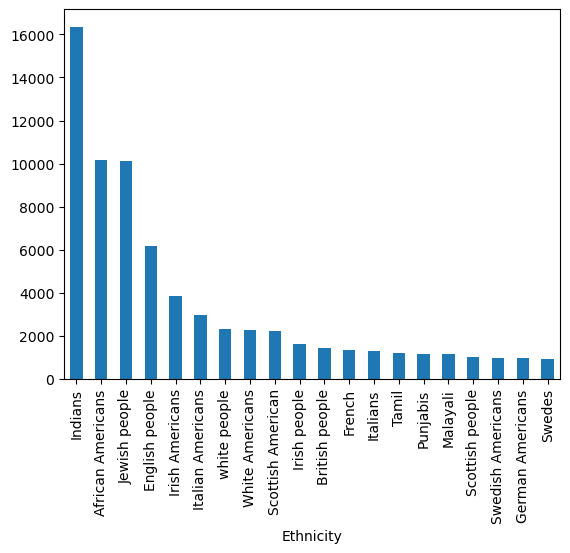

In [219]:
grouped_ethinity = characters.groupby(['Ethnicity']).count()
#grouped_ethinity = grouped_ethinity.div(grouped_ethinity.sum(axis=1), axis=0)
main_ethnicities = grouped_ethinity['Freebase actor ID'].sort_values(ascending=False)[0:20]
main_ethnicities.plot(kind='bar')

We've noticed that many characters are portrayed by Indian actors. For our project, our primary focus is on Hollywood characters. Let's filter and isolate the Hollywood characters. 

Let's narrow down our selection to include only Hollywood or American characters, meaning those characters that appear in American movies

In [220]:
characters_holywood = characters_movies[characters_movies["Movie countries"].apply(lambda x: 'United States of America' in x)]

Let's see if we can narrow down our selection to include only Hollywood actors. To do this we can visulize what is the proportion of actors per film industry by taking only the principale country of each movie.

In [75]:
characters_movies_main_country = characters_movies[characters_movies["Movie countries"] != "NaN"].copy()
characters_movies_main_country["Movie countries"] = characters_movies_main_country["Movie countries"].apply(lambda x: x[0])

In [76]:
nb_actors_per_industries = characters_movies_main_country.groupby(['Movie countries']).count()['Freebase actor ID'].sort_values(ascending=False)
nb_actors_per_industries.head(10)

Movie countries
United States of America    56780
India                       24612
United Kingdom               4655
France                       3505
Italy                         960
Canada                        953
Hong Kong                     762
Japan                         730
Spain                         484
Australia                     471
Name: Freebase actor ID, dtype: int64

To have a better view of the main industries let's consider only the industires with more than 1000 actors.

In [77]:
nb_actors_per_industries['Other'] = nb_actors_per_industries[nb_actors_per_industries < 1000].sum()
nb_actors_per_industries = nb_actors_per_industries[nb_actors_per_industries > 1000].sort_values(ascending=False)

<Axes: title={'center': 'Proportion of actors per industries'}>

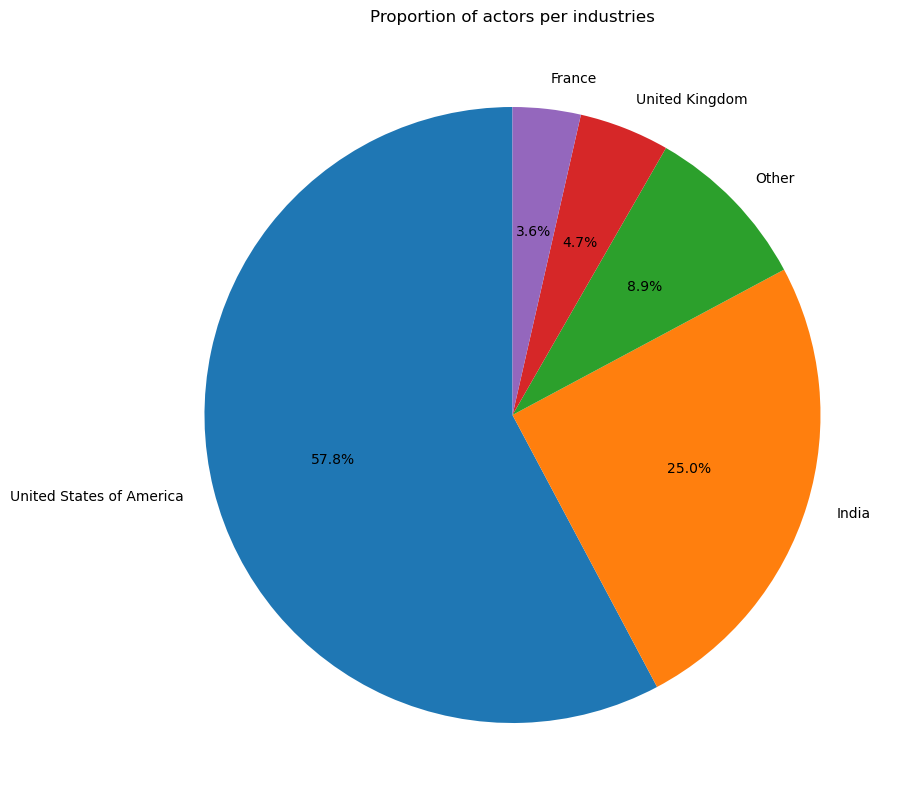

In [78]:
nb_actors_per_industries.plot.pie(figsize=(10, 10), autopct='%1.1f%%', startangle=90, title='Proportion of actors per industries', label='')
